In [ ]:
import numpy as np
import pylab as plt
%matplotlib inline

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/data100m.csv')
drive.mount("/content/drive/", force_remount=True)


x = data.iloc[:, 0].values  # Assuming the year is in the first column (column index 0).
t = data.iloc[:, 1].values  # Assuming the time in seconds is in the second column (column index 1).

x = (x - 1896)/4
sigma_sq = 0.05

Mounted at /content/drive/
Mounted at /content/drive/


In [ ]:
# Define the maximum power for the features
max_power = 4

# Initialize X with ones
X = np.ones((x.shape[0], max_power + 1))

# Fill in the columns of X with the powers of x
for i in range(1, max_power + 1):
    X[:, i] = np.power(x, i)


In [ ]:
testx = np.arange(0,40,0.1)[:,None]

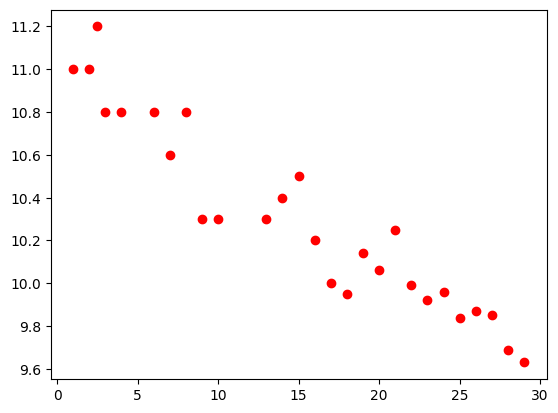

In [ ]:
plt.figure()
plt.plot(x, t,'ro')

# Define the prior mean and covariance for $w$ ($k$ is the polynomial order)

In [ ]:
k = 4 # linear
prior_mean = np.zeros((k+1,1))
prior_covariance = np.zeros((k+1,k+1))
for i in range(k+1):
    prior_covariance[i,i] = 100
print (prior_mean)
print (prior_covariance)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[100.   0.   0.   0.   0.]
 [  0. 100.   0.   0.   0.]
 [  0.   0. 100.   0.   0.]
 [  0.   0.   0. 100.   0.]
 [  0.   0.   0.   0. 100.]]




```
# This is formatted as code
```

Create $\mathbf{X}$ and $\mathbf{X}_{test}$

In [ ]:
X = np.column_stack([x ** i for i in range(k + 1)])


In [ ]:
X = np.ones_like(x)
Xtest = np.ones_like(testx)
for i in range(k):
    X = np.column_stack((X,x**(i+1)))
    Xtest = np.column_stack((Xtest,testx**(i+1)))

Sample some $\mathbf{w}$ from the prior and plot the functions

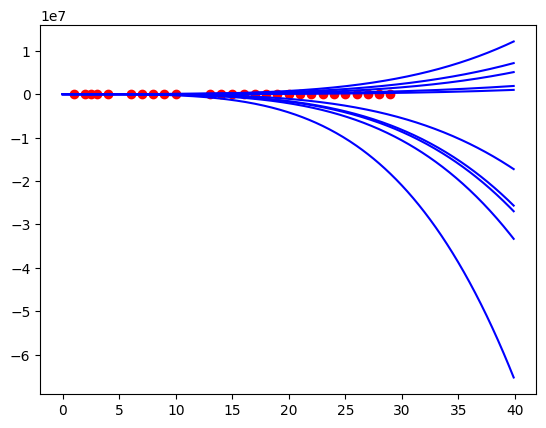

In [ ]:
plt.figure()
plt.plot(x,t,'ro')
for i in range(10):
    prior_w_samp = np.random.multivariate_normal(prior_mean.flatten(),prior_covariance)
    plt.plot(testx,np.dot(Xtest,prior_w_samp),'b')

Compute the posterior. From the slides, the posterior covariance and mean are given by:

$$ \boldsymbol\Sigma = \left(\frac{1}{\sigma^2}\mathbf{X}^T\mathbf{X} + \Sigma_0^{-1}\right)^{-1}$$

$$ \boldsymbol\mu = \frac{1}{\sigma^2}\boldsymbol\Sigma\mathbf{X}^T\mathbf{t} $$ (this expression assums the prior mean on $\mathbf{w}$ is zero.

Where, $\Sigma$ is the posterior covariance for $\mathbf{w}$, $\boldsymbol\mu$ is the mean, $\sigma^2$ the noise variance, $\boldsymbol\Sigma_0$ the prior covariance.

In [ ]:
print("Shape of X:", X.shape)
print("Shape of t:", t.shape)
print("Shape of X.T:", X.T.shape)


Shape of X: (27, 5)
Shape of t: (27,)
Shape of X.T: (5, 27)


In [ ]:
# Given values
prior_covariance_inv = np.linalg.inv(prior_covariance)  # Inverse of the prior covariance
sigma_sq = 0.05  # Noise variance

# Compute the posterior covariance
posterior_covariance = np.linalg.inv(np.linalg.inv(prior_covariance_inv) + (1.0 / sigma_sq) * X.T @ X)

# Ensure that t is a column vector with shape (number of data points, 1)
t = t.reshape(-1, 1)


# Compute the posterior mean
posterior_mean = (1.0 / sigma_sq) * posterior_covariance @ X.T @ t

# Print the posterior covariance and the transpose of the feature matrix
print("Posterior Covariance:")
print(posterior_covariance)
print("\nPosterior Mean:")
print(posterior_mean)



Posterior Covariance:
[[ 7.65299166e-03 -2.63145911e-03  2.79915452e-04 -1.17300046e-05
   1.69348473e-07]
 [-2.63145911e-03  2.83525450e-03 -4.39215191e-04  2.26139020e-05
  -3.72950363e-07]
 [ 2.79915452e-04 -4.39215191e-04  7.73373430e-05 -4.28079942e-06
   7.40047991e-08]
 [-1.17300046e-05  2.26139020e-05 -4.28079942e-06  2.47197557e-07
  -4.39703144e-09]
 [ 1.69348473e-07 -3.72950363e-07  7.40047991e-08 -4.39703144e-09
   7.97845032e-11]]

Posterior Mean:
[[ 2.59731520e+00]
 [ 2.88348195e+00]
 [-3.16668373e-01]
 [ 1.34519282e-02]
 [-1.96323383e-04]]


In [ ]:
# Given values
prior_covariance_inv = np.linalg.inv(prior_covariance)  # Inverse of the prior covariance
sigma_sq = 0.05  # Noise variance

# Ensure that t is a column vector with shape (number of data points, 1)
t = t.reshape(-1, 1)

# Compute the posterior covariance
posterior_covariance = np.linalg.inv(np.linalg.inv(prior_covariance_inv) + (1.0 / sigma_sq) * np.dot(X.T, X))

# Calculate the posterior mean
posterior_mean = np.dot(np.dot(posterior_covariance, X.T), t)

# Ensure posterior_mean is a column vector
posterior_mean = posterior_mean.reshape(-1, 1)

# Print the posterior covariance and the transpose of the feature matrix
print("Posterior Covariance:")
print(posterior_covariance)
print("\nTranspose of the Feature Matrix:")
print(X.T)



Posterior Covariance:
[[ 7.65299166e-03 -2.63145911e-03  2.79915452e-04 -1.17300046e-05
   1.69348473e-07]
 [-2.63145911e-03  2.83525450e-03 -4.39215191e-04  2.26139020e-05
  -3.72950363e-07]
 [ 2.79915452e-04 -4.39215191e-04  7.73373430e-05 -4.28079942e-06
   7.40047991e-08]
 [-1.17300046e-05  2.26139020e-05 -4.28079942e-06  2.47197557e-07
  -4.39703144e-09]
 [ 1.69348473e-07 -3.72950363e-07  7.40047991e-08 -4.39703144e-09
   7.97845032e-11]]

Transpose of the Feature Matrix:
[[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
  1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
  1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
  1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
  1.00000e+00 1.00000e+00 1.00000e+00]
 [1.00000e+00 2.00000e+00 2.50000e+00 3.00000e+00 4.00000e+00 6.00000e+00
  7.00000e+00 8.00000e+00 9.00000e+00 1.00000e+01 1.30000e+01 1.40000e+01
  1.50000e+01 1.60000e+01 1.70000e+

Sample some values from the posterior and plot them

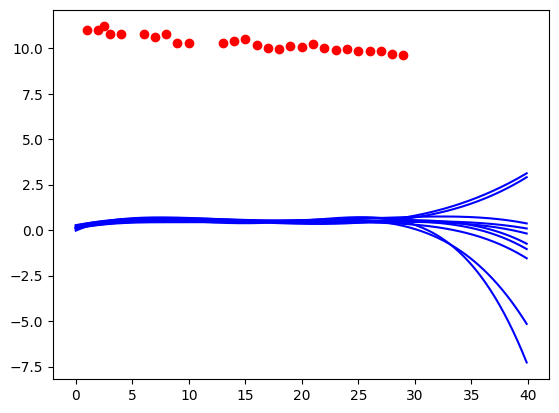

In [23]:
plt.figure()
plt.plot(x, t, 'ro')
for i in range(10):
    prior_w_samp = np.random.multivariate_normal(posterior_mean.flatten(), posterior_covariance)
    plt.plot(testx, np.dot(Xtest, prior_w_samp), 'b')


Compute the predicted mean for a test point $\mathbf{x}_*$ and its variance using the following expressions:

$$ \mu_t = \mathbf{w}^T\mathbf{x}_* $$
$$ \sigma^2_t = \sigma^2 + \mathbf{x}_*^T\boldsymbol\Sigma\mathbf{x}_* $$

In [26]:
pred_mean = np.dot(Xtest, posterior_mean)  # Compute the predicted mean

pred_var = np.zeros((len(testx), 1))
for i in range(len(testx)):
    x_star = Xtest[i, :].reshape(-1, 1)
    pred_var[i] = sigma_sq + np.dot(np.dot(x_star.T, posterior_covariance), x_star)  # Compute the predicted variance


Plot the predicted mean and variance

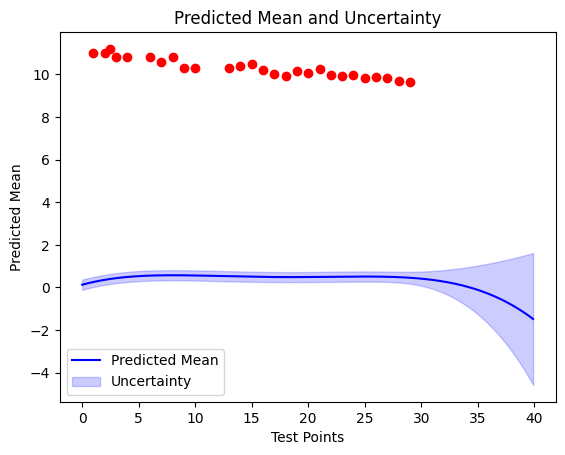

In [42]:
plt.figure()
plt.plot(x, t, 'ro')
plt.plot(testx, pred_mean, 'b', label='Predicted Mean')
plt.fill_between(testx.squeeze(), (pred_mean - np.sqrt(pred_var)).squeeze(), (pred_mean + np.sqrt(pred_var)).squeeze(), color='b', alpha=0.2, label='Uncertainty')
plt.xlabel('Test Points')
plt.ylabel('Predicted Mean')
plt.title('Predicted Mean and Uncertainty')
plt.legend()
plt.savefig('example.png')
